<a href="https://colab.research.google.com/github/cisnux-seed/machine-learning-course/blob/main/week_12/cnn_german_traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from sklearn. model_selection import train_test_split
import pickle
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

Mengimpor pustaka-pustaka yang diperlukan seperti Pandas untuk manipulasi data, NumPy untuk operasi numerik, TensorFlow untuk penggunaan jaringan saraf, Keras untuk membangun model jaringan saraf, dan sejumlah pustaka lainnya.

Berikut adalah penjelasan untuk setiap library yang Anda import dalam kode Python di atas dalam bahasa Indonesia:

1. pandas (pd):\
• Fungsi: Digunakan untuk manipulasi dan analisis data.\
• Contoh Penggunaan: Membaca, menulis, dan melakukan operasi data frame.

2. numpy (np):\
• Fungsi: Menyediakan dukungan untuk array dan operasi matematika pada array.\
• Contoh Penggunaan: Operasi array, matriks, dan fungsi matematika.

3. tensorflow (tf):\
• Fungsi: Library open-source untuk komputasi numerik yang digunakan untuk machine learning dan deep learning.\
• Contoh Penggunaan: Membangun dan melatih model machine learning.

4. keras.models (Sequential, load_model):\
• Fungsi: Memungkinkan pembuatan dan pengelolaan model neural network.\
• Contoh Penggunaan: Sequential digunakan untuk membuat model neural network secara berurutan, load_model digunakan untuk memuat model yang sudah disimpan.

5. keras.layers (Conv2D, Dense, Flatten, Dropout, MaxPool2D):\
• Fungsi: Mendefinisikan berbagai jenis layer yang dapat digunakan dalam model
neural network.\
• Contoh Penggunaan: Conv2D untuk layer konvolusi pada gambar, Dense untuk layer fully connected, Flatten untuk meratakan array, Dropout untuk mengatasi overfitting, MaxPoo|2D untuk layer pooling.

6. sklearn.model_selection (train_test_split):\
• Fungsi: Membantu dalam membagi dataset menjadi data pelatihan dan data
pengujian.\
• Contoh Penggunaan: Memisahkan dataset menjadi data pelatihan dan data pengujian untuk evaluasi model.

7. pickle:\
• Fungsi: Digunakan untuk serialisasi dan deserialisasi objek Python.\
• Contoh Penggunaan: Menyimpan dan memuat objek Python, seperti model
machine learning.

8. seaborn (sns):\
• Fungsi: Membuat visualisasi data statistik yang menarik dan informatif.\
• Contoh Penggunaan: Membuat plot statistik yang estetis.

9. matplotlib:\
• Fungsi: Library untuk membuat visualisasi grafik dua dimensi dan tiga dimensi.\
• Contoh Penggunaan: Membuat berbagai jenis plot dan grafik.

10. matplotlib.pyplot (plt):\
• Fungsi: Menyediakan ahtarmuka untuk membuat berbagai jenis plot
menggunakan matplotlib.\
• Contoh Penggunaan: Membuat dan menyesuaikan plot menggunakan fungsi-
fungsi dari matplotlib.

Semua library ini bersama-sama membentuk ekosistem yang kuat untuk pengembangan,
pelatihan, dan evaluasi model machine learning.

In [33]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Menghubungkan Google Drive agar dapat mengakses file yang ada di dalamnya.

### Load Data:

In [34]:
training_file = "/content/drive/MyDrive/sample_data/train.p"
testing_file = "/content/drive/MyDrive/sample_data/test.p"

with open(training_file, mode='rb') as f:
  train = pickle. load(f)

with open(testing_file, mode='rb') as f:
  test = pickle. load (f)
print("Data loaded")

Data loaded


Memuat data pelatihan (train.p) dan data pengujian (test.p) dari Google Drive menggunakan modul pickle.

## Load CSV:

In [35]:
sign_name_df = pd.read_csv('/content/drive/MyDrive/sample_data/signname.csv')
SIGN_NAMES = sign_name_df.SignName.values
sign_name_df.set_index('ClassId', inplace=True)
sign_name_df.head(10)

,SignName
ClassId,
0,Speed limit (20km/h)
1,Speed limit (30km/h)
2,Speed limit (50km/h)
3,Speed limit (60km/h)
4,Speed limit (70km/h)
5,Speed limit (80km/h)
6,End of speed limit (80km/h)
7,Speed limit (100km/h)
8,Speed limit (120km/h)


Memuat file CSV yang berisi mapping antara Classid (ID kelas) dengan SignName (nama
目
tanda) untuk kemudian digunakan sebagai referensi dalam hasil prediksi model.

## Displaying Data

In [36]:
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend. figure_format = 'retina'

Menetapkan gaya plot dan konfigurasi untuk menampilkan plot di dalam notebook.

## Define Features and Labels for Training Data:

In [37]:
X, y = train['features'], train['labels']

Mendefinisikan fitur (X) dan label (y) dari data pelatihan.

## Converting Lists into Numpy Arrays:

In [38]:
data = np.array(X)
labels = np.array(y)
print(data. shape, labels. shape)

(34799, 32, 32, 3) (34799,)


Mengonversi list fitur (X) dan label (y) menjadi array NumPy untuk digunakan dalam pelatihan model. Hasilnya, ukuran dan bentuk array dicetak untuk memastikan dimensinya sesuai.

## Define Features and Labels for Testing Data:

In [39]:
X_test, y_test = test['features'], test['labels']

Mendefinisikan fitur (X_test) dan label (y_test) dari data pengujian.

## Converting Lists into Numpy Arrays for Testing Data:

In [40]:
X_test = np. array(X_test)
y_test = np. array(y_test)
print(X_test.shape, y_test.shape)

(12630, 32, 32, 3) (12630,)


Mengonversi list fitur (X_test) dan label (y_test) dari data pengujian menjadi array NumPy.
Ukuran dan bentuk array dicetak untuk memastikan dimensinya sesuai.

## Split Training Data into Train and Validation Sets:

Memisahkan data pelatihan menjadi dua bagian: X_train, _train untuk pelatihan, dan X_val, y_val untuk validasi. Ukuran dan bentuk dari masing-masing set dicetak.

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=0)
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(31319, 32, 32, 3) (3480, 32, 32, 3) (31319,) (3480,)


## Plotting Histograms of Class Distribution:

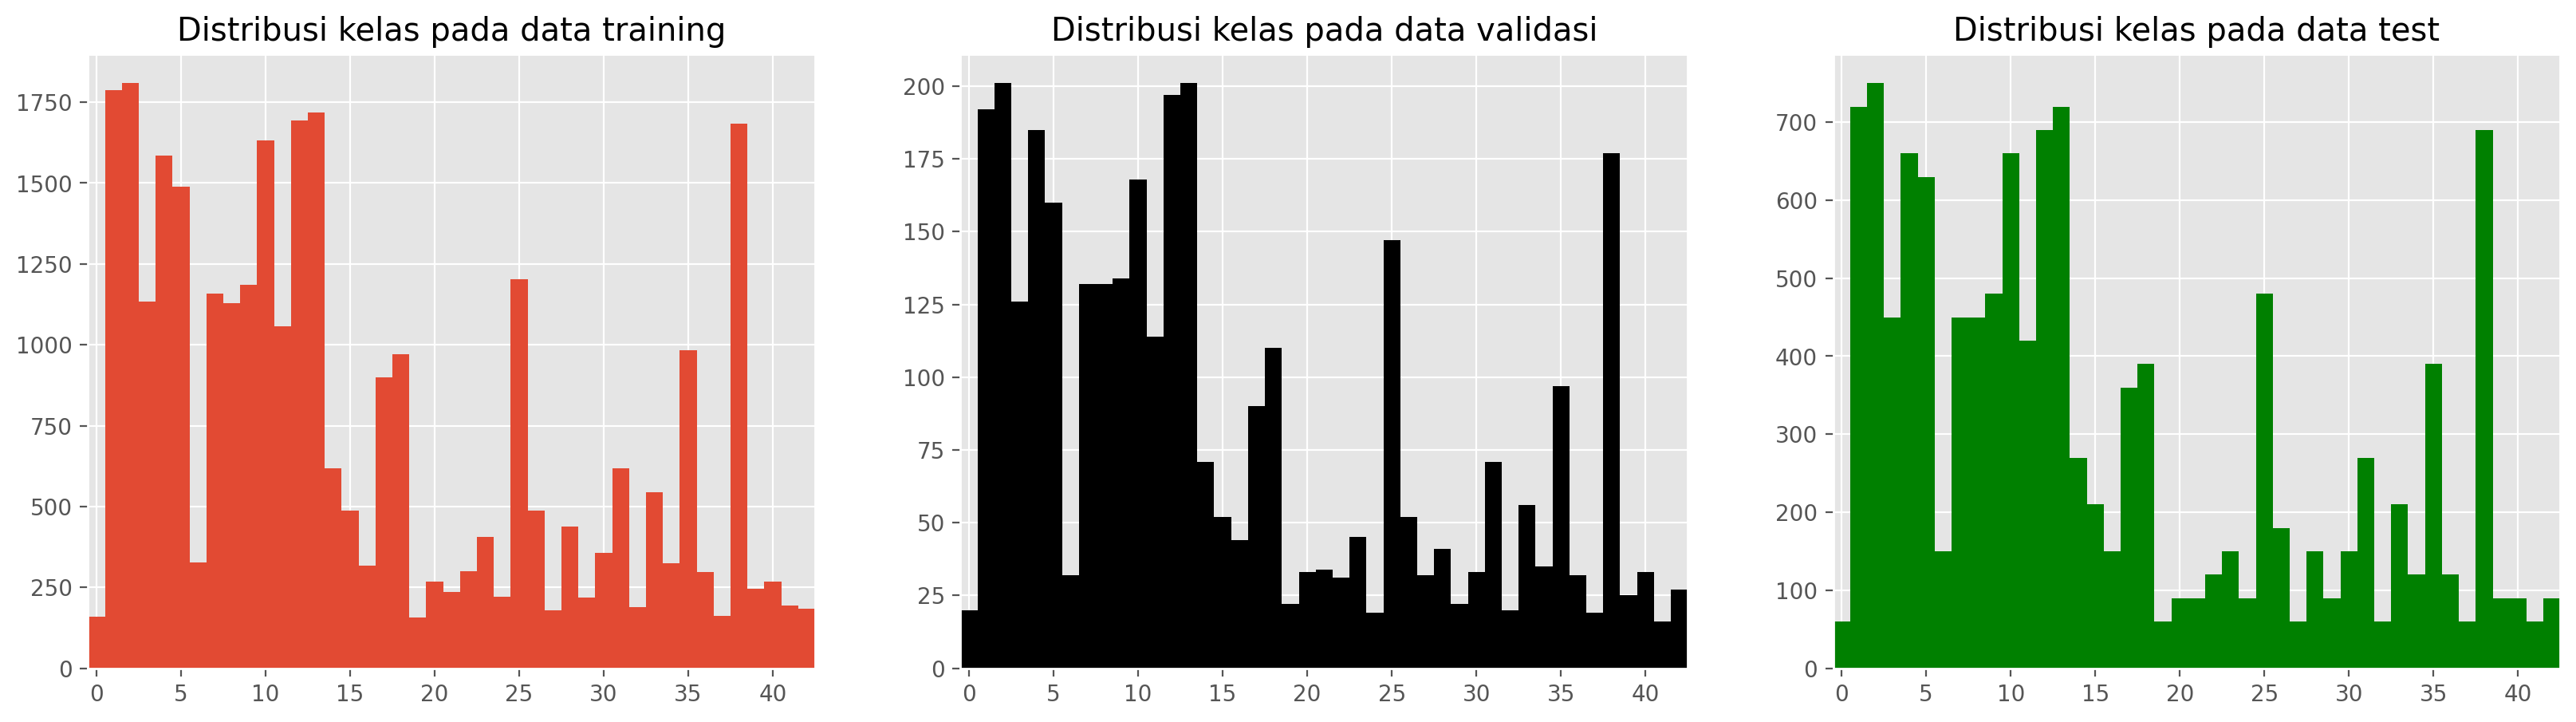

In [42]:
n_labels = np. unique (y_train). size
def hist_data(y_data, title=None, ax=None, **kwargs):
  if not ax:
    fig = plt. figure()
    ax = fig.add_subplot (111)
  ax.hist(y_data, np. arange(-0.5, n_labels+1.5), stacked=True, **kwargs)
  ax.set_xlim(-0.5, n_labels-0.5)
  if 'label' in kwargs:
    ax.legend()
  if title:
    ax.set_title(title)

fig,ax = plt.subplots(1,3, figsize=(20,5))
hist_data(y_train, title='Distribusi kelas pada data training', ax=ax[0])
hist_data(y_val, title='Distribusi kelas pada data validasi', ax=ax[1], color='black')
hist_data(y_test, title='Distribusi kelas pada data test', ax=ax[2], color='green')

Menggunakan fungsi hist_data untuk membuat histogram distribusi kelas pada data pelatihan, validasi, dan pengujian. Tiga histogram ditampilkan dalam satu baris dengan tiga subplot di bawahnya.
menggambarkan proses untuk mengonversi label ke dalam representasi one-hot encoding, mendefinisikan sebuah model Convolutional Neural Network (CNN) menggunakan Keras, dan mengatur callback untuk menghentikan pelatihan ketika akurasi mencapai tingkat tertentu.
Berikut adalah penjelasan langkah-langkahnya:

## Converting Labels into One-Hot Encoding:

In [43]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 43)
y_val = to_categorical (y_val, 43)

Menggunakan fungsi to_categorical dari Keras untuk mengonversi label pelatihan (y_train) dan label validasi (y_val) ke dalam representasi one-hot encoding. Angka 43 merupakan jumlah kelas yang ada dalam dataset.

## Callback for Early Stopping:

In [44]:
class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end (self, epoch, logs={}):
    if(logs. get ('accuracy') > 0.96):
      print("\nAkurasi telah mencapai ›96%. Stop training!")
      self.model.stop_training = True
callbacks = MyCallback()

Mendefinisikan sebuah callback MyCallback yang akan dipanggil setiap akhir epoch. Jika akurasi pada epoch tersebut melebihi 0.96, pelatihan akan dihentikan.

## Define the CNN Model:

In [45]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation= 'relu' , input_shape=X_train. shape [1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43, activation='softmax'))

Membangun model Sequential (berurutan) dengan lapisan-lapisan sebagai berikut:\
• Dua lapisan konvolusi dengan fungsi aktivasi ReLU.\
• Lapisan pengurangan dimensi menggunakan MaxPooling.\
• Lapisan Dropout untuk mengurangi overfitting.\
• Lapisan Flatten untuk mengubah output ke dalam bentuk flat sebelum masuk ke lapisan Dense.\
• Dua lapisan Dense (fully connected) dengan fungsi aktivasi ReLU dan Softmax.

## Print Model Summary:

In [46]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        25632     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 12, 12, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 12, 12, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 10, 10, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 8, 8, 64)          36928     
                                                      

Mencetak ringkasan (summary) dari arsitektur model, menampilkan informasi tentang jumlah parameter pada setiap lapisan dan total parameter pada model.

langkah-langkah setelah model CNN dibangun, seperti kompilasi model, pelatihan, evaluasi, penyimpanan model, dan visualisasi hasil pelatihan. Berikut adalah penjelasan langkah-langkahnya:

In [50]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Mengkompilasi model dengan menentukan fungsi kerugian (loss function) sebagai categorical crossentropy (karena ini adalah masalah klasifikasi multikelas), optimizer sebagai adam', dan metrik evaluasi sebagai akurasi.

## Training the Model:

In [51]:
epochs = 25
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_val, y_val), callbacks=[callbacks])

Epoch 1/25
979/979 [==============================] - 13s 7ms/step - loss: 1.7785 - accuracy: 0.5255 - val_loss: 0.5882 - val_accuracy: 0.8747
Epoch 2/25
979/979 [==============================] - 7s 7ms/step - loss: 0.5631 - accuracy: 0.8260 - val_loss: 0.1813 - val_accuracy: 0.9557
Epoch 3/25
979/979 [==============================] - 7s 7ms/step - loss: 0.3641 - accuracy: 0.8922 - val_loss: 0.1012 - val_accuracy: 0.9721
Epoch 4/25
979/979 [==============================] - 7s 8ms/step - loss: 0.2885 - accuracy: 0.9152 - val_loss: 0.0974 - val_accuracy: 0.9710
Epoch 5/25
979/979 [==============================] - 8s 8ms/step - loss: 0.2893 - accuracy: 0.9147 - val_loss: 0.0737 - val_accuracy: 0.9784
Epoch 6/25
979/979 [==============================] - 6s 6ms/step - loss: 0.2408 - accuracy: 0.9312 - val_loss: 0.0871 - val_accuracy: 0.9773
Epoch 7/25
979/979 [==============================] - 5s 5ms/step - loss: 0.2453 - accuracy: 0.9284 - val_loss: 0.0672 - val_accuracy: 0.9836
Epoch

Melatih model menggunakan data pelatihan (X_train, _train) dengan batch size sebesar 32, selama 25 epoch. Data validasi (X_val, y_val) juga digunakan untuk memantau kinerja model selama pelatihan. Callback myCallback digunakan untuk menghentikan pelatihan jika akurasi mencapai lebih dari 96%.

In [52]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


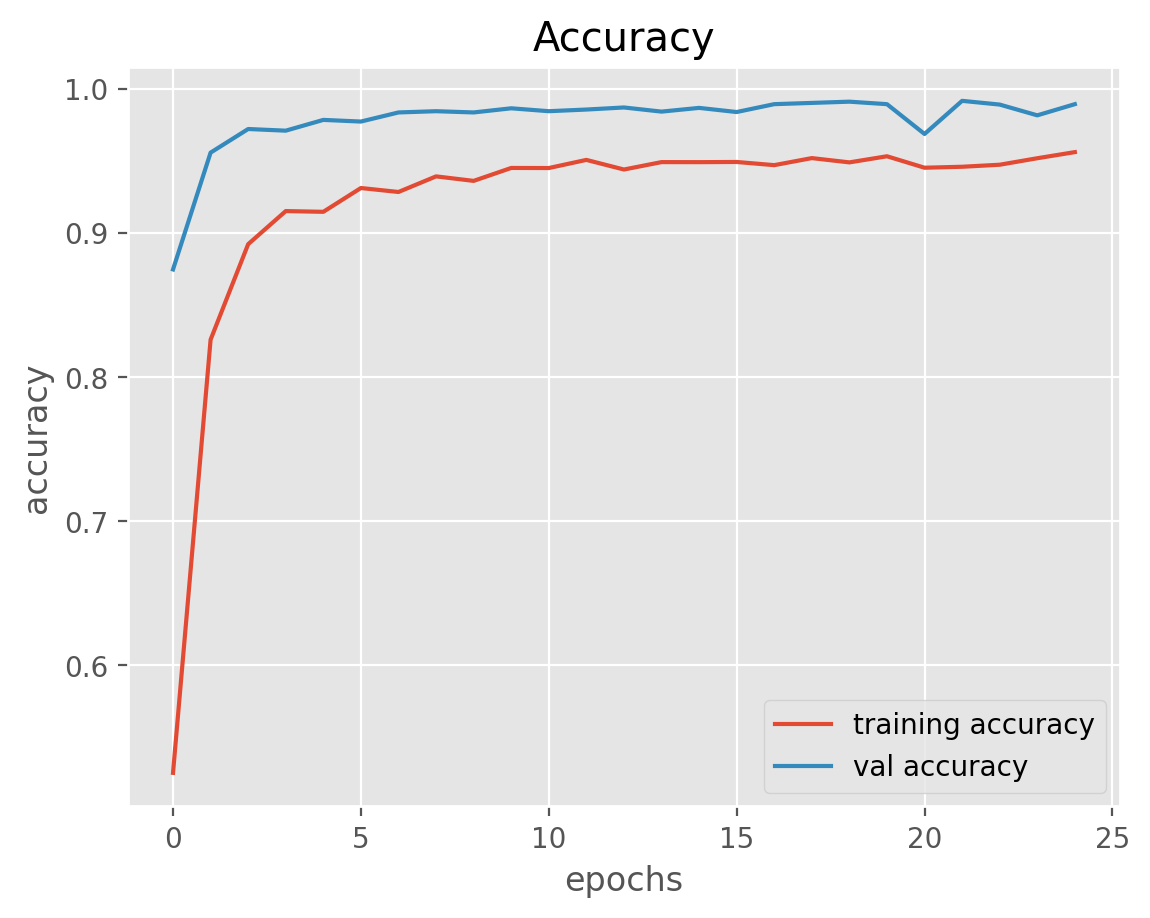

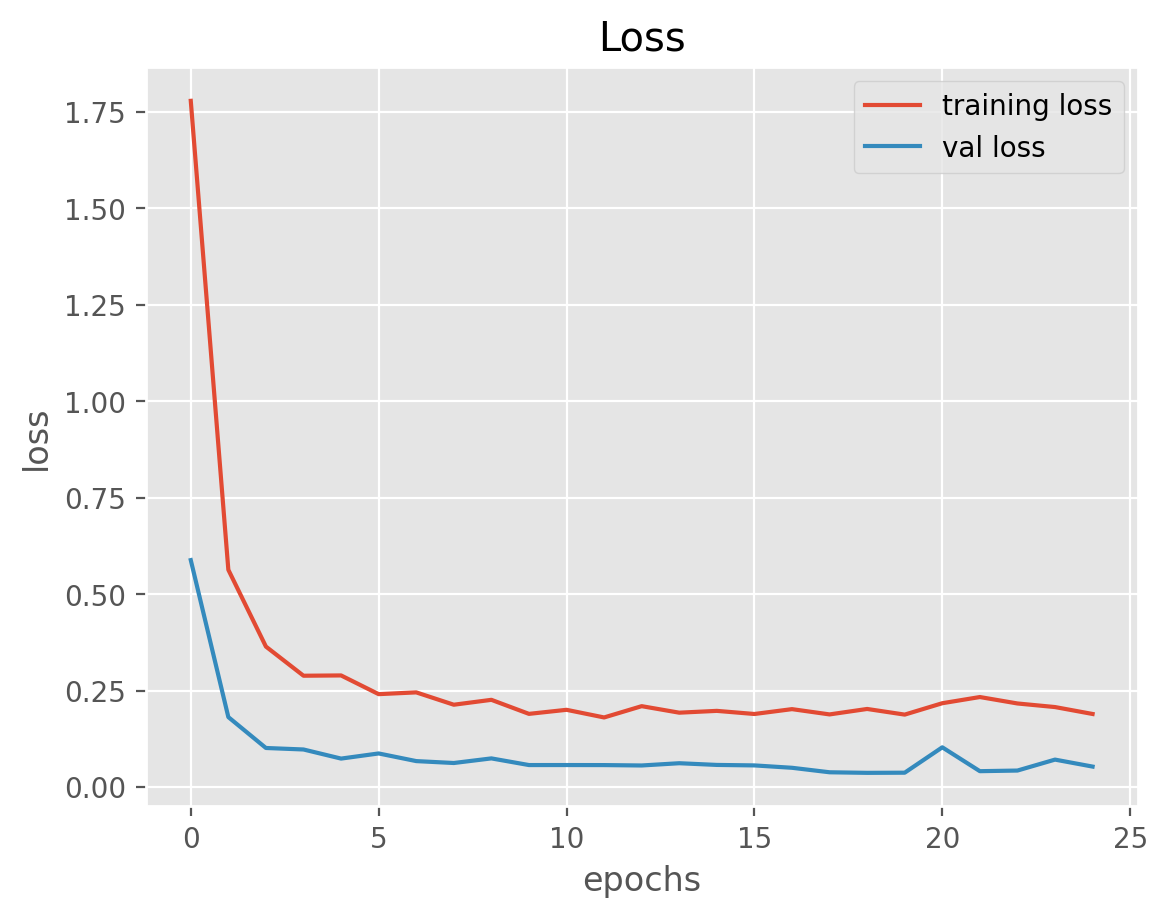

In [54]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history[ 'val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel ('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure (1)
plt.plot(history.history['loss'], label= 'training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import accuracy_score

pred = np. argmax(model.predict(X_test), axis=-1)
accuracy_score (y_test, pred)

395/395 [==============================] - 2s 5ms/step


0.9494853523357086

In [57]:
from sklearn.metrics import classification_report

print(classification_report (y_test, pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93        60
           1       0.95      0.98      0.97       720
           2       0.96      0.98      0.97       750
           3       0.92      0.93      0.93       450
           4       0.97      0.98      0.97       660
           5       0.87      0.93      0.90       630
           6       0.98      0.83      0.90       150
           7       0.96      0.94      0.95       450
           8       0.95      0.94      0.95       450
           9       0.94      1.00      0.97       480
          10       1.00      0.98      0.99       660
          11       0.92      0.96      0.94       420
          12       0.99      0.97      0.98       690
          13       0.98      0.99      0.99       720
          14       0.99      0.99      0.99       270
          15       0.95      0.99      0.97       210
          16       1.00      0.97      0.98       150
          17       0.99    